# ДЗ 2. Моделирование искусственных нейронных сетей

## Скрипт 1: Получение и обработка текстовых данных 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

Зафиксируем все случайности:

In [3]:
import tensorflow as tf
np.random.seed(666)
import random
random.seed(666)
import tensorflow
tensorflow.random.set_seed(666)
tf.random.set_seed(666)
tf.keras.utils.set_random_seed(666)   
tf.config.experimental.enable_op_determinism()

**Данные: text_34**

In [4]:
table = pd.read_csv('text_34.csv')

In [5]:
table

,Unnamed: 0,text,label
0,65546,is advanced world can Yes way then more older ...,2
1,99971,Litecoin don’t worry. @TheRealXinxi: So Bitcoi...,1
2,87189,4M RT Cloud to Coins 1 # Members @btccloud: #A...,0
3,69822,hour https://t.co/Rbf0wc14AN Symbol: 24 -12.33...,0
4,91621,sure! For https://t.co/XOz4plcrRN,2
...,...,...,...
19085,61750,#exercising… … #cryptocurrency #ICO #mining Be...,1
19086,91538,more token Check for miss RT Do not #microstac...,2
19087,31032,Swap @AirdropKitty: ✅ RT - Long📈 Now Register ...,1
19088,5835,@Cointelegraph: acceptance for “transferable p...,2


In [6]:
table.dtypes

Unnamed: 0     int64
text          object
label          int64
dtype: object

### 1. Очистка текстового массива

In [7]:
import re

In [8]:
train2 = table['text'].str.lower() #Предобработка текста
text1_test = train2.astype(str)

#Удаление специальных символов, ссылок, чисел и ретвитов
def clean_text(text):
    text = re.sub(r'[\([{})\]]', '', text) #удаляем символы
    text = re.sub(r'https:\/\/\S+', '', text) #удаляем ссылки
    text = re.sub(r'[\n/!@#$%^&*()"\u2116;\u2014:?=|\xab\xbb,\.]', ' ', text) #удаляем остаточные символы
    text = re.sub(r'[0-9+]', ' ', text) #удаляем числа
    text = re.sub(r'\brt\b', '', text) #удаляем приписку ретвитов
    return text

text1_without = text1_test.apply(clean_text)

ready_text1 = pd.DataFrame(text1_without)
ready_text1.columns = ['cleaned_posts']
ready_text1

,cleaned_posts
0,is advanced world can yes way then more older ...
1,litecoin don’t worry therealxinxi so bitcoi...
2,m cloud to coins members btccloud air...
3,hour symbol - change rdn token rai...
4,sure for
...,...
19085,exercising… … cryptocurrency ico mining be...
19086,more token check for miss do not microstack ...
19087,swap airdropkitty ✅ - long📈 now register a...
19088,cointelegraph acceptance for “transferable p...


Помимо удаления разного шума, я могла также удалить и эмодзи, но мне показалось что возможно их стоит оставить. Возможно они тоже имеют смысл, в отличии от простых символов

#### Удаляем стоп-слова из текстового массива

In [9]:
#Подгружаем список стоп слов

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trudi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stopwords.words("english") #Смотрим, какие есть стоп слова в английском языке

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
#Удаляем стоп слова из нашего текстового массива

ready_text = []

for i in ready_text1['cleaned_posts']:
    vec = [word for word in i.split() if word not in stopwords.words('english')]
    vec = ' '.join(vec)
    ready_text.append(vec)

ready_text

['advanced world yes way older digibyte frederikbf exiting it’s digibytecoin misssbitcoin brother…',
 'litecoin don’t worry therealxinxi bitcoin transactions confidential',
 'cloud coins members btccloud airdrop total bitcoin supply official limited air…',
 'hour symbol - change rdn token raiden name network price rank supply v… total',
 'sure',
 "behind avoid philosophy economics learning got bitcoin's bitcoin could politics creat… nwoodfine",
 'crypto pay – “union” taxes time european',
 'gaining amp gold expensive new airdropkitty becoming donтt go… bitcoin hold btg popular still',
 'pvx identity published payvxofficial protect crypto bit… payvx cryptocurrency payvx',
 'interested bitcoin blockchain wealthmigrate bullish http… much wealthe fomo understand wealthe_coin increased',
 'finds dutch value” bitcoin legitimate “transferable court',
 'dust open cybersecurity crushproof solid bitcoin core cell proof watertight',
 'payvxofficial us decentralized amp using theft payvx transacti

### 2. Определение размера

<Axes: ylabel='Frequency'>

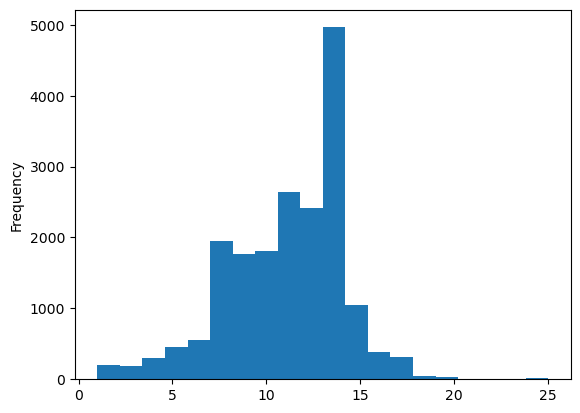

In [12]:
#Смотрим разброс длины каждого текстового сообщения

df1 = pd.DataFrame(ready_text)
df = df1[0].str.split().str.len()
df = pd.DataFrame(df)

df[0].plot(kind='hist', bins=20, title=0)

In [13]:
print(np.percentile(df, 5))
print(np.percentile(df, 95))

5.0
15.0


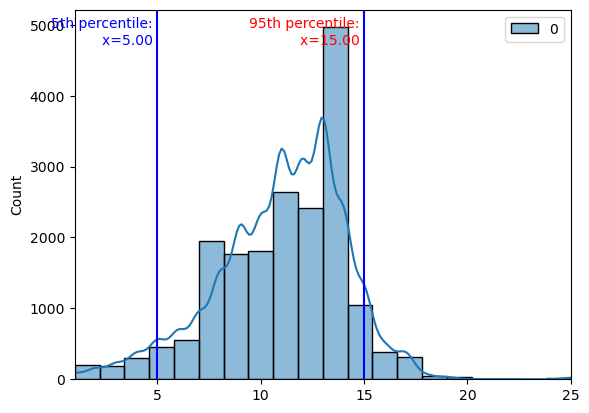

In [14]:
import seaborn as sns

ax = sns.histplot(df, bins=20, cumulative=False, kde=True, color='salmon')

perc1 = 5
perc2 = 95

x1 = np.quantile(df, perc1 / 100)
ax.axvline(x1, color='b')
ax.text(x1, 0.98, f"{perc1}th percentile: \nx={x1:.2f} ", color='b',
        ha='right', va='top', transform=ax.get_xaxis_transform())

x2 = np.quantile(df, perc2 / 100)
ax.axvline(x2, color='b')
ax.text(x2, 0.98, f"{perc2}th percentile: \nx={x2:.2f} ", color='r',
        ha='right', va='top', transform=ax.get_xaxis_transform())


ax.margins(x=0)
plt.show()

In [17]:
#Удаление выбросов на основе длины (оставляем длины между 5-м и 95-м процентилями)
min_len, max_len = np.percentile(df, 5), np.percentile(df, 95)

genral_table = pd.concat([table['label'], ready_text1['cleaned_posts'], df], axis=1)
genral_table.columns = ['label', 'cleaned_text', 'text_length']
genral_table1 = genral_table[(genral_table['text_length'] >= 5) & (genral_table['text_length'] <= 15)]

In [18]:
genral_table1

,label,cleaned_text,text_length
0,2,is advanced world can yes way then more older ...,12
1,1,litecoin don’t worry therealxinxi so bitcoi...,7
2,0,m cloud to coins members btccloud air...,11
3,0,hour symbol - change rdn token rai...,14
5,0,behind avoid not philosophy and economics lea...,12
...,...,...,...
19084,2,follow daily tweet slidecoin in a complete...,10
19085,1,exercising… … cryptocurrency ico mining be...,14
19086,2,more token check for miss do not microstack ...,13
19088,2,cointelegraph acceptance for “transferable p...,13


In [19]:
genral_table1.to_csv('genral_table1.csv', index=False)

### 3. Построение текстовых массивов

#### 3.1 Без нормировки слов

In [ ]:
#genral_table1 = pd.read_csv('filtered_table.csv')

In [20]:
original_table = genral_table1.copy()

In [21]:
original_table.head()

,label,cleaned_text,text_length
0,2,is advanced world can yes way then more older ...,12
1,1,litecoin don’t worry therealxinxi so bitcoi...,7
2,0,m cloud to coins members btccloud air...,11
3,0,hour symbol - change rdn token rai...,14
5,0,behind avoid not philosophy and economics lea...,12


#### 3.2 Стемминг

In [22]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language="english")

In [23]:
snowball.stem("finding") #тест на слове "finding" = 'find'

'find'

In [24]:
stemmed_texts = []
for text in genral_table1['cleaned_text']:
    stemmed_text = ' '.join([snowball.stem(word) for word in text.split()])
    stemmed_texts.append(stemmed_text)

#Создание DataFrame для текстов на основе стемминга
stemmed_table = genral_table1.copy()
stemmed_table['stemmed_text'] = stemmed_texts

In [25]:
#Удаляем лишнее и приводим к красивому виду
stemmed_table = stemmed_table.drop(columns=['cleaned_text'])
stemmed_table = stemmed_table[['label', 'stemmed_text', 'text_length']]

In [26]:
stemmed_table.head()

,label,stemmed_text,text_length
0,2,is advanc world can yes way then more older di...,12
1,1,litecoin don't worri therealxinxi so bitcoin a...,7
2,0,m cloud to coin member btccloud airdrop will m...,11
3,0,hour symbol - chang rdn token raiden name netw...,14
5,0,behind avoid not philosophi and econom learn g...,12


#### 3.3 Лемматизация

In [27]:
#Подгружаем базу для лемматизации

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trudi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\trudi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [28]:
from nltk.stem import WordNetLemmatizer #Импортируем лемматизатор

lemmatizer = WordNetLemmatizer()

In [29]:
lemmatizer.lemmatize('finding') #тест на слове "finding" = 'finding'

'finding'

In [30]:
lemmatized_texts = []
for text in genral_table1['cleaned_text']:
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    lemmatized_texts.append(lemmatized_text)

# Создание DataFrame для текстов на основе лемматизации
lemmatized_table = genral_table1.copy()
lemmatized_table['lemmatized_text'] = lemmatized_texts

In [31]:
#Удаляем лишнее и приводим к красивому виду
lemmatized_table = lemmatized_table.drop(columns=['cleaned_text'])
lemmatized_table = lemmatized_table[['label', 'lemmatized_text', 'text_length']]

In [32]:
lemmatized_table.head()

,label,lemmatized_text,text_length
0,2,is advanced world can yes way then more older ...,12
1,1,litecoin don’t worry therealxinxi so bitcoin a...,7
2,0,m cloud to coin member btccloud airdrop will m...,11
3,0,hour symbol - change rdn token raiden name net...,14
5,0,behind avoid not philosophy and economics lear...,12


### 4. Токенизация

Теперь у нас есть: 
1. original_table (текст после базовой очистки)
2. stemmed_table (текст, в котором слова приведены к своим основам с помощью стемминга)
3. lemmatized_table (текст, где слова приведены к нормальной форме с помощью лемматизации)

In [33]:
original_table.loc[3, 'cleaned_text']

'hour  symbol     -       change  rdn token raiden     name  network price              rank  supply          v… total'

In [34]:
stemmed_table.loc[3, 'stemmed_text']

'hour symbol - chang rdn token raiden name network price rank suppli v… total'

In [35]:
lemmatized_table.loc[3, 'lemmatized_text']

'hour symbol - change rdn token raiden name network price rank supply v… total'

В этом пункте я буду вначале подбирать параметры для каждого массива из пункта 3, а затем подобранные параметры использовать при токенизации каждого отдельного массива

#### 4.1 Токенизация на основе частности (Bag of Words)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import ParameterSampler
from sklearn.metrics.pairwise import cosine_similarity

**4.1.1**

Следующий код нужен для оптимизации модели CountVectorizer (более автоматизированного подбора параметров). Основная цель — найти наилучшую комбинацию параметров, которая позволяет создать качественное векторное представление текста с учетом контекста финансов/криптовалют/биткойна. Модель оценивается по двум критериям:

1. Косинусное сходство (насколько схожи векторные представления соседних текстов)
2. Семантическая оценка (насколько часто встречаются важные для нашей темы финансовые термины)

Подобные коды будут для каждого массива (т е всего 9)

In [38]:
#Текст для токенизации
text_data = original_table['cleaned_text']

In [41]:
#Определение параметров для поиска
param_grid = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  #Диапазоны n-грамм
    'max_df': [0.85, 0.9, 0.95, 1.0],         #Максимальная частота вхождения
    'min_df': [1, 5, 10, 15],                 #Минимальная частота вхождения
    'max_features': [500, 1000, None],        #Максимальное количество признаков
    'stop_words': [None, 'english']           #Использование стоп-слов
}

#Генерация случайных комбинаций параметров
n_iter = 10
random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_model = None
best_score = -float('inf')
best_params = None

#Перебор случайных параметров и обучение моделей CountVectorizer
for params in random_params:
    vectorizer_bow = CountVectorizer(**params)

    #Обучение векторизатора на тексте
    vectors = vectorizer_bow.fit_transform(text_data)

    #Оценка модели через косинусное сходство
    total_similarity = 0
    num_pairs = 0

    for i in range(vectors.shape[0] - 1):
        vector1 = vectors[i].toarray()
        vector2 = vectors[i + 1].toarray()

        #Проверка на наличие NaN
        if not np.isnan(vector1).any() and not np.isnan(vector2).any():
            similarity = cosine_similarity(vector1, vector2)
            total_similarity += similarity
            num_pairs += 1

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Дополнительная семантическая оценка с использованием финансовых терминов
    financial_terms = [
        'price', 'market', 'investment', 'profit', 'loss', 'currency',
        'bitcoin', 'blockchain', 'crypto', 'cryptocurrency', 'btc', 'ethereum', 'altcoin', 'token',
        'pump', 'dump', 'profit', 'loss', 'invest', 'bull', 'bear', 'transaction', 
        'mining', 'wallet', 'trading', 'exchange', 'portfolio'
    ]

    semantic_score = 0
    num_terms = 0

    for term in financial_terms:
        if term in vectorizer_bow.vocabulary_:
            index = vectorizer_bow.vocabulary_[term]
            #Если термин есть в словаре, добавляем его частоту
            semantic_score += np.sum(vectors[:, index].toarray())
            num_terms += 1

    avg_semantic_score = semantic_score / num_terms if num_terms > 0 else 0

    #Итоговая оценка модели: комбинация косинусного сходства и семантической оценки
    final_score = avg_similarity + avg_semantic_score

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее значение итоговой оценки
    if final_score > best_score:
        best_score = final_score
        best_model = vectorizer_bow
        best_params = params

print("Лучшие параметры для модели CountVectorizer с учетом семантической оценки:")
print(best_params)

Лучшие параметры для модели CountVectorizer с учетом семантической оценки:
{'stop_words': 'english', 'ngram_range': (1, 2), 'min_df': 5, 'max_features': 500, 'max_df': 0.85}


In [42]:
#Настройка параметров для модели CountVectorizer
vectorizer_bow = CountVectorizer(
    stop_words='english',   #Используем английские стоп-слова
    ngram_range=(1, 2), 
    min_df=5,               #Игнорируем слова, которые встречаются менее чем в 5 документах
    max_features=500,       #Ограничиваем словарь до 500 наиболее частых слов
    max_df=0.85             #Игнорируем слова, которые встречаются более чем в 85% документов
)

In [43]:
#Векторизация текста cleaned_text
cleaned_BoW = vectorizer_bow.fit_transform(original_table['cleaned_text'])
cleaned_BoW_df = pd.DataFrame(cleaned_BoW.toarray(), columns=vectorizer_bow.get_feature_names_out())

In [44]:
cleaned_BoW_df

,acceptance,access,address,agency,air,airdrop,airdrop airdrop,airdrop bitcoin,altcoin,altcoins,...,worldrecord,worth,worthless,wrote,xrp,year,years,yes,yo,zcash
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17597,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Строки представляют тексты (отдельные сообщения).
Столбцы представляют слова, обнаруженные в процессе токенизации.
Значения в ячейках равны 0 или больше, что указывает на количество вхождений соответствующего слова в тексте.

**4.1.2**

In [45]:
text_data = stemmed_table['stemmed_text']

In [46]:
#Определение параметров для поиска
param_grid = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  #Диапазоны n-грамм
    'max_df': [0.85, 0.9, 0.95, 1.0],         #Максимальная частота вхождения
    'min_df': [1, 5, 10, 15],                 #Минимальная частота вхождения
    'max_features': [500, 1000, None],        #Максимальное количество признаков
    'stop_words': [None, 'english']           #Использование стоп-слов
}

#Генерация случайных комбинаций параметров
n_iter = 10
random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_model = None
best_score = -float('inf')
best_params = None

#Перебор случайных параметров и обучение моделей CountVectorizer
for params in random_params:
    vectorizer_bow = CountVectorizer(**params)

    #Обучение векторизатора на тексте
    vectors = vectorizer_bow.fit_transform(text_data)

    #Оценка модели через косинусное сходство
    total_similarity = 0
    num_pairs = 0

    for i in range(vectors.shape[0] - 1):
        vector1 = vectors[i].toarray()
        vector2 = vectors[i + 1].toarray()

        #Проверка на наличие NaN
        if not np.isnan(vector1).any() and not np.isnan(vector2).any():
            similarity = cosine_similarity(vector1, vector2)
            total_similarity += similarity
            num_pairs += 1

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Дополнительная семантическая оценка с использованием финансовых терминов
    financial_terms = [
        'price', 'market', 'investment', 'profit', 'loss', 'currency',
        'bitcoin', 'blockchain', 'crypto', 'cryptocurrency', 'btc', 'ethereum', 'altcoin', 'token',
        'pump', 'dump', 'profit', 'loss', 'invest', 'bull', 'bear', 'transaction', 
        'mining', 'wallet', 'trading', 'exchange', 'portfolio'
    ]

    semantic_score = 0
    num_terms = 0

    for term in financial_terms:
        if term in vectorizer_bow.vocabulary_:
            index = vectorizer_bow.vocabulary_[term]
            # Если термин есть в словаре, добавляем его частоту
            semantic_score += np.sum(vectors[:, index].toarray())
            num_terms += 1

    avg_semantic_score = semantic_score / num_terms if num_terms > 0 else 0

    # Итоговая оценка модели: комбинация косинусного сходства и семантической оценки
    final_score = avg_similarity + avg_semantic_score

    # Обновление лучшей модели, если текущая модель имеет лучшее среднее значение итоговой оценки
    if final_score > best_score:
        best_score = final_score
        best_model = vectorizer_bow
        best_params = params

print("Лучшие параметры для модели CountVectorizer с учетом семантической оценки:")
print(best_params)

Лучшие параметры для модели CountVectorizer с учетом семантической оценки:
{'stop_words': 'english', 'ngram_range': (1, 2), 'min_df': 5, 'max_features': 500, 'max_df': 0.85}


In [47]:
#Настройка параметров для модели CountVectorizer
vectorizer_bow = CountVectorizer(
    stop_words='english',   #Используем английские стоп-слова
    ngram_range=(1, 2),     
    min_df=5,               #Игнорируем слова, которые встречаются менее чем в 5 документах
    max_features=500,       #Ограничиваем словарь до 500 наиболее частых слов
    max_df=0.85              #Игнорируем слова, которые встречаются более чем в 85% документов
)

In [48]:
#Векторизация текста stemmed_text
stemmed_BoW = vectorizer_bow.fit_transform(stemmed_table['stemmed_text'])
stemmed_BoW_df = pd.DataFrame(stemmed_BoW.toarray(), columns=vectorizer_bow.get_feature_names_out())

In [49]:
stemmed_BoW_df

,accept,access,account,address,agenc,air,airdrop,airdrop airdrop,airdrop bitcoin,alreadi,...,word,work,world,worldrecord,worth,worthless,wrote,xrp,year,zcash
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17597,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**4.1.3**

In [50]:
text_data = lemmatized_table['lemmatized_text']

In [51]:
#Определение параметров для поиска
param_grid = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  #Диапазоны n-грамм
    'max_df': [0.85, 0.9, 0.95, 1.0],         #Максимальная частота вхождения
    'min_df': [1, 5, 10, 15],                 #Минимальная частота вхождения
    'max_features': [500, 1000, None],        #Максимальное количество признаков
    'stop_words': [None, 'english']           #Использование стоп-слов
}

#Генерация случайных комбинаций параметров
n_iter = 10
random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_model = None
best_score = -float('inf')
best_params = None

#Перебор случайных параметров и обучение моделей CountVectorizer
for params in random_params:
    vectorizer_bow = CountVectorizer(**params)

    #Обучение векторизатора на тексте
    vectors = vectorizer_bow.fit_transform(text_data)

    #Оценка модели через косинусное сходство
    total_similarity = 0
    num_pairs = 0

    for i in range(vectors.shape[0] - 1):
        vector1 = vectors[i].toarray()
        vector2 = vectors[i + 1].toarray()

        #Проверка на наличие NaN
        if not np.isnan(vector1).any() and not np.isnan(vector2).any():
            similarity = cosine_similarity(vector1, vector2)
            total_similarity += similarity
            num_pairs += 1

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Дополнительная семантическая оценка с использованием финансовых терминов
    financial_terms = [
        'price', 'market', 'investment', 'profit', 'loss', 'currency',
        'bitcoin', 'blockchain', 'crypto', 'cryptocurrency', 'btc', 'ethereum', 'altcoin', 'token',
        'pump', 'dump', 'profit', 'loss', 'invest', 'bull', 'bear', 'transaction', 
        'mining', 'wallet', 'trading', 'exchange', 'portfolio'
    ]

    semantic_score = 0
    num_terms = 0

    for term in financial_terms:
        if term in vectorizer_bow.vocabulary_:
            index = vectorizer_bow.vocabulary_[term]
            # Если термин есть в словаре, добавляем его частоту
            semantic_score += np.sum(vectors[:, index].toarray())
            num_terms += 1

    avg_semantic_score = semantic_score / num_terms if num_terms > 0 else 0

    # Итоговая оценка модели: комбинация косинусного сходства и семантической оценки
    final_score = avg_similarity + avg_semantic_score

    # Обновление лучшей модели, если текущая модель имеет лучшее среднее значение итоговой оценки
    if final_score > best_score:
        best_score = final_score
        best_model = vectorizer_bow
        best_params = params

print("Лучшие параметры для модели CountVectorizer с учетом семантической оценки:")
print(best_params)

Лучшие параметры для модели CountVectorizer с учетом семантической оценки:
{'stop_words': 'english', 'ngram_range': (1, 1), 'min_df': 10, 'max_features': 500, 'max_df': 0.95}


In [ ]:
#Настройка параметров для модели CountVectorizer
vectorizer_bow = CountVectorizer(
    stop_words='english',   #Используем английские стоп-слова
    ngram_range=(1, 1),
    min_df=10,              #Игнорируем слова, которые встречаются менее чем в 1 документах
    max_features=500,       #Ограничиваем словарь до 500 наиболее частых слов
    max_df=0.95             #Игнорируем слова, которые встречаются более чем в 95% документов
)

In [72]:
#Векторизация текста lemmatized_text
lemmatized_BoW = vectorizer_bow.fit_transform(lemmatized_table['lemmatized_text'])
lemmatized_BoW_df = pd.DataFrame(lemmatized_BoW.toarray(), columns=vectorizer_bow.get_feature_names_out())

In [73]:
lemmatized_BoW_df

,acceptance,access,account,address,agency,air,airdrop,airdrop airdrop,airdrop bitcoin,altcoin,...,work,world,worldrecord,worth,worthless,wrote,xrp,year,yes,zcash
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17597,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Сохранение массивов**

In [248]:
#Сохранение BoW_df
cleaned_BoW_df.to_csv("cleaned_BoW1.csv", index=False)
stemmed_BoW_df.to_csv("stemmed_BoW1.csv", index=False)
lemmatized_BoW_df.to_csv("lemmatized_BoW1.csv", index=False)

#### 4.2 TF-IDF

**4.2.1**

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ParameterSampler
from sklearn.metrics.pairwise import cosine_similarity

In [117]:
text_data = original_table['cleaned_text']

In [119]:
#Определение параметров для поиска
param_grid = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  #Диапазоны n-грамм
    'max_df': [0.85, 0.9, 0.95],              #Максимальная частота вхождения
    'min_df': [5, 10, 15],                    #Минимальная частота вхождения
    'norm': ['l1', 'l2']                      #Нормализация (l1, l2)
}

#Генерация случайных комбинаций параметров
n_iter = 10
random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_model = None
best_score = -float('inf')
best_params = None

#Перебор случайных параметров и обучение моделей TF-IDF
for params in random_params:
    vectorizer_tfidf = TfidfVectorizer(**params)

    #Обучение векторизатора на тексте
    vectors = vectorizer_tfidf.fit_transform(text_data)

    #Оценка модели через косинусное сходство
    total_similarity = 0
    num_pairs = 0

    #Используем vectors.shape[0] для определения количества строк в разреженной матрице
    for i in range(vectors.shape[0] - 1):
        vector1 = vectors[i].toarray()
        vector2 = vectors[i + 1].toarray()

        #Проверка на наличие NaN
        if not np.isnan(vector1).any() and not np.isnan(vector2).any():
            similarity = cosine_similarity(vector1, vector2)
            total_similarity += similarity
            num_pairs += 1

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Дополнительная семантическая оценка с использованием финансовых терминов
    financial_terms = [
        'price', 'market', 'investment', 'profit', 'loss', 'currency',
        'bitcoin', 'blockchain', 'crypto', 'cryptocurrency', 'btc', 'ethereum', 'altcoin', 'token',
        'pump', 'dump', 'profit', 'loss', 'invest', 'bull', 'bear', 'transaction', 
        'mining', 'wallet', 'trading', 'exchange', 'portfolio'
    ]

    semantic_score = 0
    num_terms = 0

    for term in financial_terms:
        if term in vectorizer_tfidf.vocabulary_:
            index = vectorizer_tfidf.vocabulary_[term]
            #Если термин есть в словаре, добавляем его частоту
            semantic_score += np.sum(vectors[:, index].toarray())
            num_terms += 1

    avg_semantic_score = semantic_score / num_terms if num_terms > 0 else 0

    #Итоговая оценка модели: комбинация косинусного сходства и семантической оценки
    final_score = avg_similarity + avg_semantic_score

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее значение итоговой оценки
    if final_score > best_score:
        best_score = final_score
        best_model = vectorizer_tfidf
        best_params = params

print("Лучшие параметры для TF-IDF с учетом семантической оценки:")
print(best_params)

Лучшие параметры для TF-IDF с учетом семантической оценки:
{'norm': 'l2', 'ngram_range': (1, 1), 'min_df': 15, 'max_df': 0.95}


In [120]:
#Настройка параметров TF-IDF векторизатора
vectorizer_tfidf = TfidfVectorizer(
    analyzer='word',        #'word' — токенизация по словам
    ngram_range=(1, 1),
    max_df=0.95,            #Игнорируем слова, которые встречаются в более чем 95% документов (можем указывать числом 0 до 1)
    min_df=15,              #Игнорируем слова, которые встречаются менее чем в 15 документах
    norm='l2'               #l1 - каждый вектор в сумме дает 1; l2 - каждый вектор дает сумму квадратов равную 1
)

In [121]:
#Обучение TF-IDF векторизатора и применение к текстам original_table
vectorizer_tfidf.fit(original_table['cleaned_text'])
cleaned_TFIDF = vectorizer_tfidf.transform(original_table['cleaned_text'])
cleaned_TFIDF_df = pd.DataFrame(cleaned_TFIDF.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

In [122]:
cleaned_TFIDF_df

,_bitcoinmonster,_kevin_pham,aadhaar,about,above,absence,absolutely,abt,abuse,accept,...,york,you,younger,your,youstockproject,youtube,ysign,zaccagnino,zcash,zero
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.245582,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.394525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17595,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17596,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17597,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4.2.2**

In [123]:
text_data = stemmed_table['stemmed_text']

In [124]:
#Определение параметров для поиска
param_grid = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  #Диапазоны n-грамм
    'max_df': [0.85, 0.9, 0.95],              #Максимальная частота вхождения
    'min_df': [5, 10, 15],                    #Минимальная частота вхождения
    'norm': ['l1', 'l2']                      #Нормализация (l1, l2)
}

#Генерация случайных комбинаций параметров
n_iter = 10
random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_model = None
best_score = -float('inf')
best_params = None

#Перебор случайных параметров и обучение моделей TF-IDF
for params in random_params:
    vectorizer_tfidf = TfidfVectorizer(**params)

    #Обучение векторизатора на тексте
    vectors = vectorizer_tfidf.fit_transform(text_data)

    #Оценка модели через косинусное сходство
    total_similarity = 0
    num_pairs = 0

    #Используем vectors.shape[0] для определения количества строк в разреженной матрице
    for i in range(vectors.shape[0] - 1):
        vector1 = vectors[i].toarray()
        vector2 = vectors[i + 1].toarray()

        #Проверка на наличие NaN
        if not np.isnan(vector1).any() and not np.isnan(vector2).any():
            similarity = cosine_similarity(vector1, vector2)
            total_similarity += similarity
            num_pairs += 1

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Дополнительная семантическая оценка с использованием финансовых терминов
    financial_terms = [
        'price', 'market', 'investment', 'profit', 'loss', 'currency',
        'bitcoin', 'blockchain', 'crypto', 'cryptocurrency', 'btc', 'ethereum', 'altcoin', 'token',
        'pump', 'dump', 'profit', 'loss', 'invest', 'bull', 'bear', 'transaction', 
        'mining', 'wallet', 'trading', 'exchange', 'portfolio'
    ]

    semantic_score = 0
    num_terms = 0

    for term in financial_terms:
        if term in vectorizer_tfidf.vocabulary_:
            index = vectorizer_tfidf.vocabulary_[term]
            # Если термин есть в словаре, добавляем его частоту
            semantic_score += np.sum(vectors[:, index].toarray())
            num_terms += 1

    avg_semantic_score = semantic_score / num_terms if num_terms > 0 else 0

    #Итоговая оценка модели: комбинация косинусного сходства и семантической оценки
    final_score = avg_similarity + avg_semantic_score

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее значение итоговой оценки
    if final_score > best_score:
        best_score = final_score
        best_model = vectorizer_tfidf
        best_params = params

print("Лучшие параметры для TF-IDF с учетом семантической оценки:")
print(best_params)

Лучшие параметры для TF-IDF с учетом семантической оценки:
{'norm': 'l2', 'ngram_range': (1, 1), 'min_df': 15, 'max_df': 0.95}


In [125]:
# Настройка параметров TF-IDF векторизатора
vectorizer_tfidf = TfidfVectorizer(
    analyzer='word',        #'word' — токенизация по словам
    ngram_range=(1, 1),
    max_df=0.95,            #Игнорируем слова, которые встречаются в более чем 95% документов (можем указывать числом 0 до 1)
    min_df=15,              #Игнорируем слова, которые встречаются менее чем в 15 документах
    norm='l2'               #l1 - каждый вектор в сумме дает 1; l2 - каждый вектор дает сумму квадратов равную 1
)

In [126]:
#Обучение TF-IDF векторизатора и применение к текстам stemmed_table
vectorizer_tfidf.fit(stemmed_table['stemmed_text'])
stemmed_TFIDF = vectorizer_tfidf.transform(stemmed_table['stemmed_text'])
stemmed_TFIDF_df = pd.DataFrame(stemmed_TFIDF.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

In [127]:
stemmed_TFIDF_df

,_bitcoinmonst,_kevin_pham,aadhaar,about,abov,absenc,absolut,abt,abus,accept,...,york,you,younger,your,youstockproject,youtub,ysign,zaccagnino,zcash,zero
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.176473,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.283503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17595,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17596,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17597,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.266106,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4.2.3**

In [128]:
text_data = lemmatized_table['lemmatized_text']

In [129]:
#Определение параметров для поиска
param_grid = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  #Диапазоны n-грамм
    'max_df': [0.85, 0.9, 0.95],              #Максимальная частота вхождения
    'min_df': [5, 10, 15],                    #Минимальная частота вхождения
    'norm': ['l1', 'l2']                      #Нормализация (l1, l2)
}

#Генерация случайных комбинаций параметров
n_iter = 10
random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_model = None
best_score = -float('inf')
best_params = None

#Перебор случайных параметров и обучение моделей TF-IDF
for params in random_params:
    vectorizer_tfidf = TfidfVectorizer(**params)

    #Обучение векторизатора на тексте
    vectors = vectorizer_tfidf.fit_transform(text_data)

    #Оценка модели через косинусное сходство
    total_similarity = 0
    num_pairs = 0

    #Используем vectors.shape[0] для определения количества строк в разреженной матрице
    for i in range(vectors.shape[0] - 1):
        vector1 = vectors[i].toarray()
        vector2 = vectors[i + 1].toarray()

        #Проверка на наличие NaN
        if not np.isnan(vector1).any() and not np.isnan(vector2).any():
            similarity = cosine_similarity(vector1, vector2)
            total_similarity += similarity
            num_pairs += 1

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Дополнительная семантическая оценка с использованием финансовых терминов
    financial_terms = [
        'price', 'market', 'investment', 'profit', 'loss', 'currency',
        'bitcoin', 'blockchain', 'crypto', 'cryptocurrency', 'btc', 'ethereum', 'altcoin', 'token',
        'pump', 'dump', 'profit', 'loss', 'invest', 'bull', 'bear', 'transaction', 
        'mining', 'wallet', 'trading', 'exchange', 'portfolio'
    ]

    semantic_score = 0
    num_terms = 0

    for term in financial_terms:
        if term in vectorizer_tfidf.vocabulary_:
            index = vectorizer_tfidf.vocabulary_[term]
            # Если термин есть в словаре, добавляем его частоту
            semantic_score += np.sum(vectors[:, index].toarray())
            num_terms += 1

    avg_semantic_score = semantic_score / num_terms if num_terms > 0 else 0

    #Итоговая оценка модели: комбинация косинусного сходства и семантической оценки
    final_score = avg_similarity + avg_semantic_score

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее значение итоговой оценки
    if final_score > best_score:
        best_score = final_score
        best_model = vectorizer_tfidf
        best_params = params

print("Лучшие параметры для TF-IDF с учетом семантической оценки:")
print(best_params)

Лучшие параметры для TF-IDF с учетом семантической оценки:
{'norm': 'l2', 'ngram_range': (1, 1), 'min_df': 15, 'max_df': 0.95}


In [130]:
#Настройка параметров TF-IDF векторизатора
vectorizer_tfidf = TfidfVectorizer(
    analyzer='word',        #'word' — токенизация по словам
    ngram_range=(1, 1),
    max_df=0.95,            #Игнорируем слова, которые встречаются в более чем 95% документов (можем указывать числом 0 до 1)
    min_df=15,              #Игнорируем слова, которые встречаются менее чем в 15 документах
    norm='l2'               #l1 - каждый вектор в сумме дает 1; l2 - каждый вектор дает сумму квадратов равную 1
)

In [131]:
#Обучение TF-IDF векторизатора и применение к текстам lemmatized_table
vectorizer_tfidf.fit(lemmatized_table['lemmatized_text'])
lemmatized_TFIDF = vectorizer_tfidf.transform(lemmatized_table['lemmatized_text'])
lemmatized_TFIDF_df = pd.DataFrame(lemmatized_TFIDF.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

In [132]:
lemmatized_TFIDF_df

,_bitcoinmonster,_kevin_pham,aadhaar,about,above,absence,absolutely,abt,abuse,accept,...,york,you,younger,your,youstockproject,youtube,ysign,zaccagnino,zcash,zero
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.245582,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.394525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17594,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17595,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17596,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17597,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Сохранение массивов**

In [249]:
#Сохранение TF-IDF_df
cleaned_TFIDF_df.to_csv("cleaned_TFIDF1.csv", index=False)
stemmed_TFIDF_df.to_csv("stemmed_TFIDF1.csv", index=False)
lemmatized_TFIDF_df.to_csv("lemmatized_TFIDF1.csv", index=False)

#### 4.3 Word2Vec

In [111]:
from gensim.models import Word2Vec
from nltk import word_tokenize

In [112]:
#Загрузка ресурса punkt для токенизации
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trudi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [113]:
#Токенизация текстов
cleaned_tokens = [word_tokenize(text) for text in original_table['cleaned_text']]
stemmed_tokens = [word_tokenize(text) for text in stemmed_table['stemmed_text']]
lemmatized_tokens = [word_tokenize(text) for text in lemmatized_table['lemmatized_text']]

**4.3.1**

In [114]:
import random

In [144]:
#Токенизация текста
cleaned_tokens = [word_tokenize(text) for text in original_table['cleaned_text']]

In [148]:
#Определение параметров для поиска
param_grid = {
    'vector_size': [200, 250, 300],
    'window': [5, 10],
    'min_count': [5, 10, 15],
    'sg': [0, 1],
    'alpha': [0.01, 0.05, 0.1],
    'min_alpha': [0.0001, 0.0005, 0.001],
    'negative': [5, 10, 15]
}

#Генерация случайных комбинаций параметров
n_iter = 10
random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_model = None
best_score = -float('inf')

#Перебор случайных параметров и обучение моделей Word2Vec
for params in random_params:
    model = Word2Vec(sentences=cleaned_tokens, **params)
    #Оценка модели с использованием косинусного сходства
    from sklearn.metrics.pairwise import cosine_similarity

    #Создание примера для оценки (средний вектор всех слов в корпусе)
    example_vector = np.mean([model.wv[word] for word in model.wv.index_to_key], axis=0).reshape(1, -1)

    #Оценка модели через среднее косинусное сходство
    total_similarity = 0
    num_pairs = 0

    for i in range(len(cleaned_tokens) - 1):
        if len(cleaned_tokens[i]) > 0 and len(cleaned_tokens[i + 1]) > 0:
            vector1 = np.mean([model.wv[word] for word in cleaned_tokens[i] if word in model.wv], axis=0).reshape(1, -1)
            vector2 = np.mean([model.wv[word] for word in cleaned_tokens[i + 1] if word in model.wv], axis=0).reshape(1, -1)

            if not np.isnan(vector1).any() and not np.isnan(vector2).any():
                similarity = cosine_similarity(vector1, vector2)
                total_similarity += similarity
                num_pairs += 1

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Дополнительная семантическая оценка с использованием финансовых терминов
    financial_terms = [
        'price', 'market', 'investment', 'profit', 'loss', 'currency',
        'bitcoin', 'blockchain', 'crypto', 'cryptocurrency', 'btc', 'ethereum', 'altcoin', 'token',
        'pump', 'dump', 'profit', 'loss', 'invest', 'bull', 'bear', 'transaction', 
        'mining', 'wallet', 'trading', 'exchange', 'portfolio'
    ]

    semantic_score = 0
    num_terms = 0

    for term in financial_terms:
        if term in model.wv:
            most_similar = model.wv.most_similar(term, topn=10)
            #Оценка на основе наличия финансовых терминов в ближайших словах
            relevant_terms = [word for word, score in most_similar if word in financial_terms]
            semantic_score += len(relevant_terms)
            num_terms += 1

    avg_semantic_score = semantic_score / num_terms if num_terms > 0 else 0

    #Итоговая оценка модели: комбинация косинусного сходства и семантической оценки
    final_score = avg_similarity + avg_semantic_score

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее значение итоговой оценки
    if final_score > best_score:
        best_score = final_score
        best_model = model
        best_params = params

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее косинусное сходство
    if avg_similarity > best_score:
        best_score = avg_similarity
        best_model = model
        best_params = params
    #Например, использовать косинусное сходство для оценки качества векторов слов

print("Лучшие параметры для модели Word2Vec с учетом семантической оценки:")
print(best_params)

Лучшие параметры для модели Word2Vec с учетом семантической оценки:
{'window': 5, 'vector_size': 300, 'sg': 1, 'negative': 15, 'min_count': 10, 'min_alpha': 0.0001, 'alpha': 0.01}


В данном случае я решаю сравнить вариант из лекции и полученный мной вариант

Стандартный вариант из лекции:

In [134]:
#Создание модели Word2Vec и обучение на cleaned_text
w2v_model_cleaned = Word2Vec(sentences=cleaned_tokens, 
                             vector_size=300, 
                             alpha=0.1,
                             min_alpha=0.0001,
                             window=5,           #количество слов вокруг целевого слова, которые модель будет учитывать как контекст
                             min_count=15,       #слова, которые встречаются меньше 15 раз, не будут учтены при обучении
                             sg=1,               #какой алгоритм будет использоваться для обучения модели. 1 = Skip-gram, 2 = CBOW
                             negative=10
                             )
cleaned_word2vec_vectors = [np.mean([w2v_model_cleaned.wv[word] for word in text if word in w2v_model_cleaned.wv], axis=0) 
                            if len(text) > 0 else np.zeros(300) for text in cleaned_tokens]

Полученный при реализации кода:

In [149]:
#Создание модели Word2Vec и обучение на cleaned_text
w2v_model_cleaned = Word2Vec(sentences=cleaned_tokens, 
                             vector_size=300, 
                             alpha=0.01,
                             min_alpha=0.0001,
                             window=5,           #количество слов вокруг целевого слова, которые модель будет учитывать как контекст
                             min_count=10,       #слова, которые встречаются меньше 15 раз, не будут учтены при обучении
                             sg=1,               #какой алгоритм будет использоваться для обучения модели. 1 = Skip-gram, 2 = CBOW
                             negative=15
                             )
cleaned_word2vec_vectors = [np.mean([w2v_model_cleaned.wv[word] for word in text if word in w2v_model_cleaned.wv], axis=0) 
                            if len(text) > 0 else np.zeros(300) for text in cleaned_tokens]

In [150]:
w2v_model_cleaned.build_vocab(cleaned_tokens)
w2v_model_cleaned.wv.key_to_index

{'bitcoin': 0,
 'the': 1,
 'to': 2,
 'a': 3,
 'is': 4,
 'and': 5,
 'of': 6,
 'in': 7,
 'for': 8,
 '-': 9,
 '…': 10,
 'blockchain': 11,
 'you': 12,
 'we': 13,
 '’': 14,
 'crypto': 15,
 'price': 16,
 'airdrop': 17,
 'will': 18,
 'cryptocurrency': 19,
 'on': 20,
 'with': 21,
 'i': 22,
 'our': 23,
 'that': 24,
 'total': 25,
 'your': 26,
 'supply': 27,
 'are': 28,
 'be': 29,
 'ethereum': 30,
 'it': 31,
 'btc': 32,
 's': 33,
 'change': 34,
 'rank': 35,
 'hour': 36,
 "'s": 37,
 'name': 38,
 'this': 39,
 'symbol': 40,
 'bethereumteam': 41,
 'have': 42,
 'volume': 43,
 'at': 44,
 'about': 45,
 'what': 46,
 'by': 47,
 'out': 48,
 'm': 49,
 'do': 50,
 'twitter': 51,
 'currency': 52,
 'how': 53,
 'new': 54,
 'can': 55,
 'as': 56,
 "'re": 57,
 'official': 58,
 'ico': 59,
 'gymrewards': 60,
 'from': 61,
 'world': 62,
 'amp': 63,
 'all': 64,
 'get': 65,
 'ramencoin': 66,
 'now': 67,
 'has': 68,
 'down': 69,
 'token': 70,
 'eth': 71,
 'not': 72,
 'more': 73,
 'money': 74,
 'up': 75,
 'article': 76,
 '

Тест на стандартном варианте:

In [136]:
vector_cleaned = w2v_model_cleaned.wv['price']  # get numpy vector of a word
sims_cleaned = w2v_model_cleaned.wv.most_similar('price', topn=10)
print(sims_cleaned)

[('summit', 0.4726969003677368), ('freedom', 0.4715909957885742), ('mar', 0.430367648601532), ('evx', 0.4302864074707031), ('regulator', 0.42882776260375977), ('r', 0.41105881333351135), ('fears', 0.41009339690208435), ('atb', 0.40641871094703674), ('adamludwin', 0.40572330355644226), ('forex', 0.40520715713500977)]


Тест на подобранном варианте:

In [151]:
vector_cleaned = w2v_model_cleaned.wv['price']  # get numpy vector of a word
sims_cleaned = w2v_model_cleaned.wv.most_similar('price', topn=10)
print(sims_cleaned)

[('along', 0.8604229092597961), ('service', 0.850221574306488), ('tag', 0.817221462726593), ('talking', 0.8134005069732666), ('complete', 0.8126822113990784), ('beta', 0.8097176551818848), ('campaigns', 0.8096612095832825), ('card', 0.8086581826210022), ('scam', 0.8067005276679993), ('🎂', 0.8001748323440552)]


Подобранный вариант выглядит лучше, в сравнении со стандартным, так как:
1. Коэффициенты схожести выше, что указывает на более сильные связи между словами
2. Похожие слова являются более осмысленными и релевантными в финансовом контексте

В связи с чем в этом случае и далее я буду использовать подобранные варианты. И даже ранее я использовала данный подход, просто сравнила на модели W2V

In [152]:
pd.Series(w2v_model_cleaned.wv.key_to_index).shape

(2526,)

In [206]:
#Дообучение на основной очищенной таблице
#w2v_model_cleaned.train(genral_table1['cleaned_text'], total_examples=w2v_model_cleaned.corpus_count, epochs=30, report_delay=1)

In [ ]:
#Сохраняем модель
#w2v_model_cleaned.save("w2v_model_cleaned.model")

In [ ]:
#Подгружаем модель
#model = Word2Vec.load("word2vec.model")

#Можно также продолжить тренировать модель
#model.train([["bitcoin", "world"]], total_examples=1, epochs=1)

In [153]:
cleaned_word2vec_vectors[0]

array([-3.64355482e-02,  2.17410296e-01, -1.23743758e-01,  4.74351048e-02,
        5.60624199e-03, -2.50095040e-01,  1.28805816e-01,  3.82236034e-01,
        2.14231592e-02, -1.18945725e-01,  1.40129298e-01, -9.18869004e-02,
        2.05022153e-02, -1.13942146e-01, -7.52626732e-02, -7.60183409e-02,
        2.07607076e-01,  1.34856496e-02,  6.01618886e-02, -3.90920863e-02,
       -6.45356923e-02, -2.91828830e-02,  5.68663739e-02,  2.68065482e-02,
       -1.00334346e-01,  3.66154835e-02, -2.09992811e-01,  1.32147864e-01,
       -1.01666197e-01, -1.03954084e-01, -2.11733524e-04, -9.56360549e-02,
        3.13434154e-02,  5.74102113e-03, -5.09715937e-02,  6.07501157e-02,
        7.42147490e-02, -2.87731797e-01,  1.19985351e-02,  3.10161691e-02,
       -9.57221016e-02, -2.93145720e-02,  1.27083194e-02, -1.15764454e-01,
        1.84338883e-01,  1.71333119e-01, -9.63999182e-02,  5.74925877e-02,
        1.19545870e-01,  8.52023736e-02,  5.99346645e-02, -6.18599681e-03,
        1.00429924e-02,  

**4.3.2**

In [154]:
#Токенизация текста
stemmed_tokens = [word_tokenize(text) for text in stemmed_table['stemmed_text']]

In [155]:
#Определение параметров для поиска
param_grid = {
    'vector_size': [200, 250, 300],
    'window': [5, 10],
    'min_count': [5, 10, 15],
    'sg': [0, 1],
    'alpha': [0.01, 0.05, 0.1],
    'min_alpha': [0.0001, 0.0005, 0.001],
    'negative': [5, 10, 15]
}

#Генерация случайных комбинаций параметров
n_iter = 10
random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_model = None
best_score = -float('inf')

#Перебор случайных параметров и обучение моделей Word2Vec
for params in random_params:
    model = Word2Vec(sentences=stemmed_tokens, **params)
    #Оценка модели с использованием косинусного сходства
    from sklearn.metrics.pairwise import cosine_similarity

    #Создание примера для оценки (средний вектор всех слов в корпусе)
    example_vector = np.mean([model.wv[word] for word in model.wv.index_to_key], axis=0).reshape(1, -1)

    #Оценка модели через среднее косинусное сходство
    total_similarity = 0
    num_pairs = 0

    for i in range(len(stemmed_tokens) - 1):
        if len(stemmed_tokens[i]) > 0 and len(stemmed_tokens[i + 1]) > 0:
            vector1 = np.mean([model.wv[word] for word in stemmed_tokens[i] if word in model.wv], axis=0).reshape(1, -1)
            vector2 = np.mean([model.wv[word] for word in stemmed_tokens[i + 1] if word in model.wv], axis=0).reshape(1, -1)

            if not np.isnan(vector1).any() and not np.isnan(vector2).any():
                similarity = cosine_similarity(vector1, vector2)
                total_similarity += similarity
                num_pairs += 1

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Дополнительная семантическая оценка с использованием финансовых терминов
    financial_terms = [
        'price', 'market', 'investment', 'profit', 'loss', 'currency',
        'bitcoin', 'blockchain', 'crypto', 'cryptocurrency', 'btc', 'ethereum', 'altcoin', 'token',
        'pump', 'dump', 'profit', 'loss', 'invest', 'bull', 'bear', 'transaction', 
        'mining', 'wallet', 'trading', 'exchange', 'portfolio'
    ]

    semantic_score = 0
    num_terms = 0

    for term in financial_terms:
        if term in model.wv:
            most_similar = model.wv.most_similar(term, topn=10)
            #Оценка на основе наличия финансовых терминов в ближайших словах
            relevant_terms = [word for word, score in most_similar if word in financial_terms]
            semantic_score += len(relevant_terms)
            num_terms += 1

    avg_semantic_score = semantic_score / num_terms if num_terms > 0 else 0

    #Итоговая оценка модели: комбинация косинусного сходства и семантической оценки
    final_score = avg_similarity + avg_semantic_score

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее значение итоговой оценки
    if final_score > best_score:
        best_score = final_score
        best_model = model
        best_params = params

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее косинусное сходство
    if avg_similarity > best_score:
        best_score = avg_similarity
        best_model = model
        best_params = params
    #Например, использовать косинусное сходство для оценки качества векторов слов

print("Лучшие параметры для модели Word2Vec с учетом семантической оценки:")
print(best_params)

Лучшие параметры для модели Word2Vec с учетом семантической оценки:
{'window': 5, 'vector_size': 300, 'sg': 0, 'negative': 15, 'min_count': 10, 'min_alpha': 0.001, 'alpha': 0.01}


In [186]:
#Создание модели Word2Vec и обучение на stemmed_text
w2v_model_stemmed = Word2Vec(sentences=stemmed_tokens, 
                             vector_size=300, 
                             alpha=0.01,
                             min_alpha=0.001,
                             window=5,           #количество слов вокруг целевого слова, которые модель будет учитывать как контекст
                             min_count=10,       #слова, которые встречаются меньше 15 раз, не будут учтены при обучении
                             sg=0,               #какой алгоритм будет использоваться для обучения модели. 1 = Skip-gram, 2 = CBOW
                             negative=15
                             )
stemmed_word2vec_vectors = [np.mean([w2v_model_stemmed.wv[word] for word in text if word in w2v_model_stemmed.wv], axis=0) 
                            if len(text) > 0 else np.zeros(300) for text in stemmed_tokens]

In [187]:
w2v_model_stemmed.build_vocab(stemmed_tokens)
w2v_model_stemmed.wv.key_to_index

{'bitcoin': 0,
 'the': 1,
 'to': 2,
 'a': 3,
 'is': 4,
 'and': 5,
 'in': 6,
 'of': 7,
 'for': 8,
 '-': 9,
 '…': 10,
 'blockchain': 11,
 'you': 12,
 'cryptocurr': 13,
 'we': 14,
 'price': 15,
 'crypto': 16,
 'airdrop': 17,
 'will': 18,
 'on': 19,
 'with': 20,
 'i': 21,
 'it': 22,
 'total': 23,
 'our': 24,
 'that': 25,
 'be': 26,
 'your': 27,
 'hour': 28,
 'suppli': 29,
 'are': 30,
 'ethereum': 31,
 'chang': 32,
 'btc': 33,
 'rank': 34,
 'do': 35,
 'name': 36,
 'this': 37,
 'symbol': 38,
 'bethereumteam': 39,
 'have': 40,
 'volum': 41,
 'at': 42,
 "'": 43,
 'about': 44,
 'what': 45,
 'by': 46,
 'out': 47,
 'currenc': 48,
 'r': 49,
 'twitter': 50,
 'token': 51,
 'how': 52,
 'new': 53,
 'ico': 54,
 'as': 55,
 'can': 56,
 'offici': 57,
 'get': 58,
 'm': 59,
 'gymreward': 60,
 'from': 61,
 'world': 62,
 'exchang': 63,
 'amp': 64,
 'all': 65,
 'ramencoin': 66,
 'invest': 67,
 'now': 68,
 'has': 69,
 'down': 70,
 'market': 71,
 'eth': 72,
 'not': 73,
 'make': 74,
 'up': 75,
 'celebr': 76,
 'mo

In [188]:
vector_stemmed = w2v_model_stemmed.wv['price']  # get numpy vector of a word
sims_stemmed = w2v_model_stemmed.wv.most_similar('price', topn=10)
print(sims_stemmed)

[('over', 0.963814914226532), ('how', 0.9606630206108093), ('rate', 0.9589539170265198), ('below', 0.9587149024009705), ('right', 0.9547949433326721), ('stephanlivera', 0.9533931016921997), ('call', 0.951804518699646), ('support', 0.9508281350135803), ('-', 0.9480569362640381), ('fail', 0.9476056098937988)]


In [189]:
stemmed_word2vec_vectors[0]

array([-1.24935895e-01,  2.42247999e-01, -3.76177095e-02,  2.53894717e-01,
       -4.60323058e-02, -1.73784584e-01,  2.18922228e-01,  5.55967212e-01,
        6.99463785e-02, -3.60123143e-02,  8.47545043e-02, -1.21186860e-01,
       -1.87899813e-01, -1.36120334e-01, -1.74610719e-01, -1.50765300e-01,
        1.73428312e-01,  1.65325791e-01,  1.92017183e-02, -1.56770617e-01,
       -4.25874665e-02,  1.10810855e-02,  8.64943117e-02,  5.48645593e-02,
        1.71082959e-01,  5.58548653e-03, -2.76533782e-01,  7.78925121e-02,
       -1.31895438e-01, -1.59742370e-01,  9.75795910e-02, -1.63456202e-01,
       -1.09830312e-01,  1.34528624e-02,  3.20842117e-02,  1.17772393e-01,
        1.12691656e-01, -2.48453140e-01, -6.08467497e-02,  1.30585745e-01,
        4.95666228e-02, -2.72839498e-02,  9.22827050e-02, -2.32787356e-01,
        1.02796778e-01,  1.41354293e-01,  1.17535487e-01, -3.13386619e-02,
        2.10537147e-02,  1.51785225e-01,  1.20487772e-01, -9.04112160e-02,
       -1.29978240e-01,  

**4.3.3**

In [173]:
#Токенизация текста
lemmatized_tokens = [word_tokenize(text) for text in lemmatized_table['lemmatized_text']]

In [185]:
#Определение параметров для поиска
param_grid = {
    'vector_size': [200, 250, 300],
    'window': [5, 10],
    'min_count': [5, 10, 15],
    'sg': [0, 1],
    'alpha': [0.01, 0.05, 0.1],
    'min_alpha': [0.0001, 0.0005, 0.001],
    'negative': [5, 10, 15]
}

#Генерация случайных комбинаций параметров
n_iter = 10
random_params = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=42))

best_model = None
best_score = -float('inf')

#Перебор случайных параметров и обучение моделей Word2Vec
for params in random_params:
    model = Word2Vec(sentences=lemmatized_tokens, **params)
    #Оценка модели с использованием косинусного сходства
    from sklearn.metrics.pairwise import cosine_similarity

    #Создание примера для оценки (средний вектор всех слов в корпусе)
    example_vector = np.mean([model.wv[word] for word in model.wv.index_to_key], axis=0).reshape(1, -1)

    #Оценка модели через среднее косинусное сходство
    total_similarity = 0
    num_pairs = 0

    for i in range(len(lemmatized_tokens) - 1):
        if len(lemmatized_tokens[i]) > 0 and len(lemmatized_tokens[i + 1]) > 0:
            vector1 = np.mean([model.wv[word] for word in lemmatized_tokens[i] if word in model.wv], axis=0).reshape(1, -1)
            vector2 = np.mean([model.wv[word] for word in lemmatized_tokens[i + 1] if word in model.wv], axis=0).reshape(1, -1)

            if not np.isnan(vector1).any() and not np.isnan(vector2).any():
                similarity = cosine_similarity(vector1, vector2)
                total_similarity += similarity
                num_pairs += 1

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Дополнительная семантическая оценка с использованием финансовых терминов
    financial_terms = [
        'price', 'market', 'investment', 'profit', 'loss', 'currency',
        'bitcoin', 'blockchain', 'crypto', 'cryptocurrency', 'btc', 'ethereum', 'altcoin', 'token',
        'pump', 'dump', 'profit', 'loss', 'invest', 'bull', 'bear', 'transaction', 
        'mining', 'wallet', 'trading', 'exchange', 'portfolio'
    ]

    semantic_score = 0
    num_terms = 0

    for term in financial_terms:
        if term in model.wv:
            most_similar = model.wv.most_similar(term, topn=10)
            #Оценка на основе наличия финансовых терминов в ближайших словах
            relevant_terms = [word for word, score in most_similar if word in financial_terms]
            semantic_score += len(relevant_terms)
            num_terms += 1

    avg_semantic_score = semantic_score / num_terms if num_terms > 0 else 0

    #Итоговая оценка модели: комбинация косинусного сходства и семантической оценки
    final_score = avg_similarity + avg_semantic_score

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее значение итоговой оценки
    if final_score > best_score:
        best_score = final_score
        best_model = model
        best_params = params

    avg_similarity = total_similarity / num_pairs if num_pairs > 0 else 0

    #Обновление лучшей модели, если текущая модель имеет лучшее среднее косинусное сходство
    if avg_similarity > best_score:
        best_score = avg_similarity
        best_model = model
        best_params = params
    #Например, использовать косинусное сходство для оценки качества векторов слов

print("Лучшие параметры для модели Word2Vec с учетом семантической оценки:")
print(best_params)

Лучшие параметры для модели Word2Vec с учетом семантической оценки:
{'window': 5, 'vector_size': 300, 'sg': 0, 'negative': 15, 'min_count': 10, 'min_alpha': 0.001, 'alpha': 0.01}


In [182]:
#Создание модели Word2Vec и обучение на lemmatized_text
w2v_model_lemmatized = Word2Vec(sentences=lemmatized_tokens, 
                             vector_size=300, 
                             alpha=0.01,
                             min_alpha=0.001,
                             window=5,           #количество слов вокруг целевого слова, которые модель будет учитывать как контекст
                             min_count=10,       #слова, которые встречаются меньше 10 раз, не будут учтены при обучении
                             sg=0,               #какой алгоритм будет использоваться для обучения модели. 1 = Skip-gram, 2 = CBOW
                             negative=15
                             )
lemmatized_word2vec_vectors = [np.mean([w2v_model_lemmatized.wv[word] for word in text if word in w2v_model_lemmatized.wv], axis=0) 
                            if len(text) > 0 else np.zeros(300) for text in lemmatized_tokens]

In [183]:
w2v_model_lemmatized.build_vocab(lemmatized_tokens)
w2v_model_lemmatized.wv.key_to_index

{'bitcoin': 0,
 'the': 1,
 'to': 2,
 'a': 3,
 'is': 4,
 'and': 5,
 'in': 6,
 'of': 7,
 'for': 8,
 '-': 9,
 '…': 10,
 'blockchain': 11,
 'you': 12,
 'we': 13,
 'price': 14,
 '’': 15,
 'crypto': 16,
 'airdrop': 17,
 'will': 18,
 'cryptocurrency': 19,
 'on': 20,
 'with': 21,
 'i': 22,
 'it': 23,
 'our': 24,
 'that': 25,
 'total': 26,
 'your': 27,
 'hour': 28,
 'supply': 29,
 'are': 30,
 'be': 31,
 'ethereum': 32,
 'btc': 33,
 's': 34,
 'change': 35,
 'rank': 36,
 "'s": 37,
 'name': 38,
 'this': 39,
 'symbol': 40,
 'bethereumteam': 41,
 'have': 42,
 'volume': 43,
 'at': 44,
 'about': 45,
 'what': 46,
 'by': 47,
 'out': 48,
 'm': 49,
 'currency': 50,
 'do': 51,
 'twitter': 52,
 'token': 53,
 'how': 54,
 'new': 55,
 'can': 56,
 "'re": 57,
 'official': 58,
 'ico': 59,
 'gymrewards': 60,
 'from': 61,
 'world': 62,
 'exchange': 63,
 'amp': 64,
 'all': 65,
 'get': 66,
 'ramencoin': 67,
 'now': 68,
 'ha': 69,
 'down': 70,
 'eth': 71,
 'not': 72,
 'more': 73,
 'coin': 74,
 'market': 75,
 'money': 

In [184]:
vector_lemmatized = w2v_model_lemmatized.wv['price']  # get numpy vector of a word
sims_lemmatized = w2v_model_lemmatized.wv.most_similar('price', topn=10)
print(sims_lemmatized)

[('n', 0.954154908657074), ('abuse', 0.9524820446968079), ('gop', 0.9520959258079529), ('email', 0.9516656398773193), ('donтt', 0.9497743248939514), ('have', 0.9473673105239868), ('public', 0.945539116859436), ('this', 0.9406680464744568), ('one', 0.9338911771774292), ('currency', 0.9304229021072388)]


In [190]:
lemmatized_word2vec_vectors[0]

array([-0.12498399,  0.3175601 ,  0.06581514,  0.27272668, -0.1236803 ,
       -0.5340567 , -0.08989283,  0.6912085 ,  0.02619208, -0.1617666 ,
       -0.00704437, -0.02598478,  0.20176663,  0.01842391, -0.08334651,
       -0.37167504,  0.16385804,  0.09303951,  0.13686965, -0.04747153,
       -0.250584  , -0.08865426,  0.26094857,  0.22344097,  0.19030145,
       -0.06617669, -0.41561836, -0.01261704, -0.22610903, -0.11184686,
        0.16256142, -0.24643783,  0.35284537,  0.2371056 , -0.0988187 ,
        0.20281224,  0.07484148, -0.3733464 , -0.19185027,  0.11871286,
       -0.1095473 ,  0.07658119,  0.16917963, -0.1664644 , -0.01282176,
        0.40302914,  0.17150553,  0.01577643, -0.1235792 ,  0.23966864,
        0.08208598, -0.15884422, -0.11750318,  0.15311047, -0.06264633,
        0.26185316,  0.09553198,  0.10645942, -0.07798865, -0.08161889,
       -0.08025941,  0.13303468, -0.08806487,  0.10205936, -0.02201414,
        0.19463643,  0.01343971,  0.07329489,  0.0434057 , -0.10

**Сохранение массивов**

In [191]:
#Сохранение моделей Word2Vec
w2v_model_cleaned.save("w2v_model_cleaned.model")
w2v_model_stemmed.save("w2v_model_stemmed.model")
w2v_model_lemmatized.save("w2v_model_lemmatized.model")

In [230]:
import pickle

#Сохранение векторов в виде списков с помощью pickle
with open("cleaned_word2vec_vectors.pkl", "wb") as f:
    pickle.dump(cleaned_word2vec_vectors, f)

with open("stemmed_word2vec_vectors.pkl", "wb") as f:
    pickle.dump(stemmed_word2vec_vectors, f)

with open("lemmatized_word2vec_vectors.pkl", "wb") as f:
    pickle.dump(lemmatized_word2vec_vectors, f)

### 5. Статистика по датасетам

In [ ]:
#Считываем ранее сохраненные CSV файлы
#cleaned_BoW_df = pd.read_csv("cleaned_BoW.csv")
#stemmed_BoW_df = pd.read_csv("stemmed_BoW.csv")
#lemmatized_BoW_df = pd.read_csv("lemmatized_BoW.csv")

#cleaned_TFIDF_df = pd.read_csv("cleaned_TFIDF.csv")
#stemmed_TFIDF_df = pd.read_csv("stemmed_TFIDF.csv")
#lemmatized_TFIDF_df = pd.read_csv("lemmatized_TFIDF.csv")

In [206]:
def get_token_statistics(df, name):
    #Общее количество токенов — сумма всех значений в DataFrame
    total_tokens = df.sum().sum()
    
    #Количество уникальных токенов
    unique_tokens = len(df.columns)

    #Наиболее популярные токены (топ-10)
    most_popular_tokens = df.sum().sort_values(ascending=False).head(10)
    
    #Наименее популярные токены (топ-5)
    least_popular_tokens = df.sum().sort_values(ascending=True).head(5)

    print(f"Статистика для {name}:")
    print(f"  Общее количество токенов: {total_tokens}")
    print(f"  Количество уникальных токенов: {unique_tokens}")
    print(f"  Наиболее популярные токены:\n{most_popular_tokens}")
    print(f"  Наименее популярные токены:\n{least_popular_tokens}\n")

In [ ]:
#Получение статистики для каждого DataFrame

In [207]:
get_token_statistics(cleaned_BoW_df, "cleaned BoW")

Статистика для cleaned BoW:
  Общее количество токенов: 115027
  Количество уникальных токенов: 500
  Наиболее популярные токены:
bitcoin           11222
blockchain         2356
crypto             2050
airdrop            1831
price              1828
cryptocurrency     1819
total              1432
supply             1395
ethereum           1334
btc                1280
dtype: int64
  Наименее популярные токены:
past                 72
bitcoin airdrop      72
pm                   72
ramencoin airdrop    72
yo                   72
dtype: int64



In [208]:
get_token_statistics(stemmed_BoW_df, "stemmed BoW")

Статистика для stemmed BoW:
  Общее количество токенов: 123769
  Количество уникальных токенов: 500
  Наиболее популярные токены:
bitcoin       11301
blockchain     2370
crypto         2071
cryptocurr     2022
price          1889
airdrop        1862
total          1490
hour           1435
suppli         1395
ethereum       1334
dtype: int64
  Наименее популярные токены:
chart          76
small          76
chain          76
hour volum     77
total volum    77
dtype: int64



In [209]:
get_token_statistics(lemmatized_BoW_df, "lemmatized BoW")

Статистика для lemmatized BoW:
  Общее количество токенов: 118851
  Количество уникальных токенов: 500
  Наиболее популярные токены:
bitcoin           11222
blockchain         2356
crypto             2050
price              1889
airdrop            1846
cryptocurrency     1819
total              1432
hour               1430
supply             1395
ethereum           1334
dtype: int64
  Наименее популярные токены:
service            73
send               73
bitcoin airdrop    73
bigger             73
laundering         73
dtype: int64



В среднем по BoW массивам получается 120000 токенов, самыми популярными токенами являются bitcoin, blockchain, crypto. Различие в основном в самых непопулярных токенах

In [210]:
get_token_statistics(cleaned_TFIDF_df, "cleaned TF-IDF")

Статистика для cleaned TF-IDF:
  Общее количество токенов: 56857.68183734776
  Количество уникальных токенов: 1772
  Наиболее популярные токены:
bitcoin       1097.163188
the            821.473207
to             672.807135
is             523.130044
and            496.343078
in             478.397359
of             470.830116
for            462.279578
blockchain     436.064314
crypto         387.886890
dtype: float64
  Наименее популярные токены:
voxeltoken     4.218749
alexpickard    4.335902
defend         4.444865
welcomed       4.632309
congress       4.734991
dtype: float64



In [211]:
get_token_statistics(stemmed_TFIDF_df, "stemmed TF-IDF")

Статистика для stemmed TF-IDF:
  Общее количество токенов: 57397.71287138224
  Количество уникальных токенов: 1615
  Наиболее популярные токены:
bitcoin       1090.398350
the            815.106377
to             675.009005
is             523.717789
and            491.461263
in             486.167685
for            462.640441
of             461.136668
blockchain     431.714908
price          391.453506
dtype: float64
  Наименее популярные токены:
voxeltoken      4.072650
alexpickard     4.265464
digitalkeith    4.687281
congress        4.823209
sidechain       5.132902
dtype: float64



In [212]:
get_token_statistics(lemmatized_TFIDF_df, "lemmatized TF-IDF")

Статистика для lemmatized TF-IDF:
  Общее количество токенов: 56935.335330735674
  Количество уникальных токенов: 1699
  Наиболее популярные токены:
bitcoin       1097.337790
the            821.184278
to             675.243947
is             525.654711
and            494.085184
in             486.006864
of             467.910945
for            463.985470
blockchain     436.088600
price          391.904684
dtype: float64
  Наименее популярные токены:
alexpickard     4.264000
voxeltoken      4.299874
defend          4.392419
digitalkeith    4.715546
congress        4.815238
dtype: float64



В среднем по TF-IDF массивам получается 57000 токенов, самыми популярными токенами являются bitcoin, the, to. Различие также в основном в самых непопулярных токенах

In [ ]:
#Импортируем модель Word2Vec из gensim
#from gensim.models import Word2Vec

#Загрузка моделей Word2Vec
#w2v_model_cleaned = Word2Vec.load("w2v_model_cleaned.model")
#w2v_model_stemmed = Word2Vec.load("w2v_model_stemmed.model")
#w2v_model_lemmatized = Word2Vec.load("w2v_model_lemmatized.model")

In [225]:
#Получение наименее популярных токенов в Word2Vec
def get_word2vec_statistics(model, name, top_n=10):
    vocab = list(model.wv.index_to_key)
    vocab_size = len(vocab)

    #Словарь с частотами слов
    word_frequencies = {word: model.wv.get_vecattr(word, 'count') for word in vocab}

    #Сортировка по частотам
    sorted_vocab = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)
    most_popular = sorted_vocab[:top_n]
    least_popular = sorted_vocab[-top_n:]

    print(f"Статистика для модели {name}:")
    print(f"  Количество уникальных токенов: {vocab_size}")
    print(f"  Топ-{top_n} самых популярных токенов:")
    for word, count in most_popular:
        print(f"    {word} - {count} ")
    
    print(f"\n  Топ-{top_n} наименее популярных токенов:")
    for word, count in least_popular:
        print(f"    {word} - {count} ")
    print("\n")

In [ ]:
#Получение статистики для каждой модели Word2Vec

In [226]:
get_word2vec_statistics(w2v_model_cleaned, "Word2Vec Cleaned")

Статистика для модели Word2Vec Cleaned:
  Количество уникальных токенов: 2526
  Топ-10 самых популярных токенов:
    bitcoin - 10944 
    the - 7197 
    to - 5429 
    a - 4027 
    is - 3629 
    and - 3389 
    of - 3197 
    in - 3193 
    for - 3009 
    - - 2635 

  Топ-10 наименее популярных токенов:
    halvening - 10 
    matetokay - 10 
    yourself - 10 
    freiexchange - 10 
    progress - 10 
    smartcontracts - 10 
    debate - 10 
    scaling - 10 
    design - 10 
    flcr - 10 




In [227]:
get_word2vec_statistics(w2v_model_stemmed, "Word2Vec Stemmed")

Статистика для модели Word2Vec Stemmed:
  Количество уникальных токенов: 2268
  Топ-10 самых популярных токенов:
    bitcoin - 11034 
    the - 7199 
    to - 5429 
    a - 4027 
    is - 3632 
    and - 3389 
    in - 3239 
    of - 3197 
    for - 3009 
    - - 2635 

  Топ-10 наименее популярных токенов:
    equi - 10 
    narrat - 10 
    blockcha… - 10 
    sign-up - 10 
    matetokay - 10 
    barrier - 10 
    cybertoolsbook - 10 
    analyst - 10 
    ¥ - 10 
    second - 10 




In [228]:
get_word2vec_statistics(w2v_model_lemmatized, "Word2Vec Lemmatized")

Статистика для модели Word2Vec Lemmatized:
  Количество уникальных токенов: 2413
  Топ-10 самых популярных токенов:
    bitcoin - 10944 
    the - 7197 
    to - 5429 
    a - 4735 
    is - 3629 
    and - 3389 
    in - 3239 
    of - 3197 
    for - 3009 
    - - 2635 

  Топ-10 наименее популярных токенов:
    effective - 10 
    your… - 10 
    fed - 10 
    girl - 10 
    explain - 10 
    cold - 10 
    sense - 10 
    et… - 10 
    extremely - 10 
    widely - 10 




### БОНУС

Можно создать синтетические тексты с помощью комбинирования похожих векторов. Для этого я буду использовать модель Word2Vec и воспользуюсь полученными векторами, чтобы создавать новые предложения

Возьму очищенную 'cleaned_word2vec_vectors' без дополнительных обработок

In [242]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re

In [243]:
num_synthetic_texts = 2000  # Количество создаваемых синтетических предложений
vectors_new = cleaned_word2vec_vectors  # Основа, на основе которой создаем датасет

In [244]:
synthetic_texts = []  # Список синтетических предложений

#Пары похожих векторов для создания новых текстов
for _ in range(num_synthetic_texts):
    #Случайный выбор двух векторов из корпуса
    idx1, idx2 = np.random.choice(len(vectors_new), 2, replace=False)

    #Получение векторов
    vec1 = vectors_new[idx1]
    vec2 = vectors_new[idx2]

    #Проверка на отсутствие пустых векторов (нулевых)
    if vec1 is not None and vec2 is not None and np.any(vec1) and np.any(vec2):
        #Вычисление косинусного сходства между двумя векторами
        similarity = cosine_similarity([vec1], [vec2])[0][0]

        #Если векторы достаточно похожи, создаем новый синтетический вектор
        if similarity > 0.85:  # Повышаем порог схожести
            #Генерация случайного веса в зависимости от схожести
            weight = np.random.uniform(0.4, 0.6) + (similarity - 0.8) * 0.1
            synthetic_vector = weight * vec1 + (1 - weight) * vec2  # Взвешенное среднее двух похожих векторов
            synthetic_texts.append(synthetic_vector)

#Преобразование синтетических векторов в текст с использованием модели Word2Vec
def vector_to_text(vector, model, top_n=10):
    #Получение ближайших слов для вектора
    similar_words = model.wv.similar_by_vector(vector, topn=top_n)
    return " ".join([word for word, similarity in similar_words])

#Преобразование синтетических векторов в текст с использованием модели Word2Vec
synthetic_texts_final = [vector_to_text(vec, w2v_model_cleaned) for vec in synthetic_texts]

#Очистка синтетического текста от эмодзи и случайных символов
def remove_noise(text):
    text = re.sub(r'[^\w\s]', '', text)  #Удаление всех символов, кроме букв, цифр и пробелов
    return text

synthetic_texts_filtered = [remove_noise(text) for text in synthetic_texts_final]

with open("synthetic_dataset.txt", "w", encoding="utf-8") as file: #Сохранение в файл
    for text in synthetic_texts_filtered:
        file.write(text + "\n")

for i, text in enumerate(synthetic_texts_filtered[:10]): #Пример синтетических текстов
    print(f"Синтетический текст {i+1}: {text}")

Синтетический текст 1: size drag doing investor model filebazaar bit look careful pinned
Синтетический текст 2: forward openplatformico masternode discovery afraid attack highly mthereum cobrabitcoin sales
Синтетический текст 3: bit experiencing im principalagent roll know doing xem et investor
Синтетический текст 4: recover potentially celebration dropping  followback swiss  tdx morning
Синтетический текст 5: added overview photos introduce dark mo eventually newsbtc playing bringing
Синтетический текст 6: feel revolutionary pi various gon principalagent  move bit cryptocoinsnews
Синтетический текст 7: shocking advantage billion  japan cloudminingx mining btc backing win
Синтетический текст 8: followback freedom cases  blockmason energy night looks distributes morning
Синтетический текст 9: follo nice signals peter rd fell joefloccari importance attending head
Синтетический текст 10: doing model bit size filebazaar buying investor experiencing roll cryptocoinsnews


Важные пункты:
1. Использую готовые векторы из 'cleaned_word2vec_vectors'. Cлучайным образом выбираются два вектора, если они оба не пустые (не содержат только нули), вычисляется их косинусное сходство (чтобы определить степень схожести между ними).
2. Порог схожести 0.85 для того чтобы тексты создавались из более похожих пар векторов. Если степень схожести > 0.85, создаем новый синтетический вектор как взвешенное среднее двух векторов. В этом коде веса векторов зависят от степени их сходства, что позволяет более гибко комбинировать информацию из исходных текстов. Случайное взвешивание при вычислении среднего вектора (weight * vec1 + (1 - weight) * vec2) добавляет вариативности и позволяет создать более уникальные, но при этом осмысленные тексты
3. Функция 'vector_to_text' ищет ближайшие слова для вектора в модели Word2Vec и объединяет их в текст. Это позволяет создать осмысленный текст на основе числовых представлений
4. Также тексты очищаю от эмодзи и случайных символов с помощью функции 'remove_noise', чтобы онибыли более аккуратными и не содержали ненужных символов. В данном случае я решила удалить эмодзи и случайные символы, так как они добавляли шума при создании искусственных предложений